## Notebook to test PSF generator and aslo save PSFs to use for the simulator

In [1]:
import psf_generator as psf
import numpy as np
from psf_generator import ScalarSphericalPropagator
from psf_generator.utils.plots import plot_pupil, plot_psf

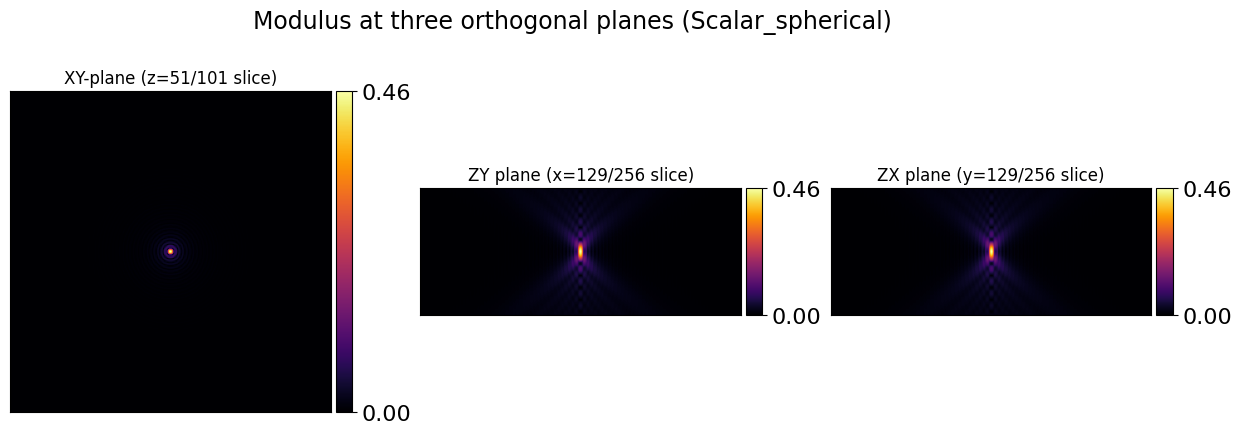

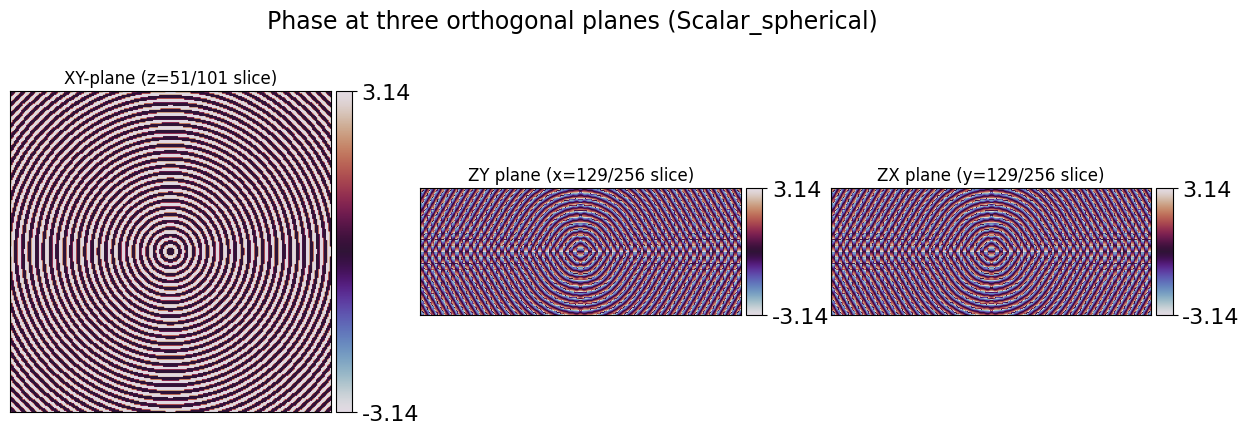

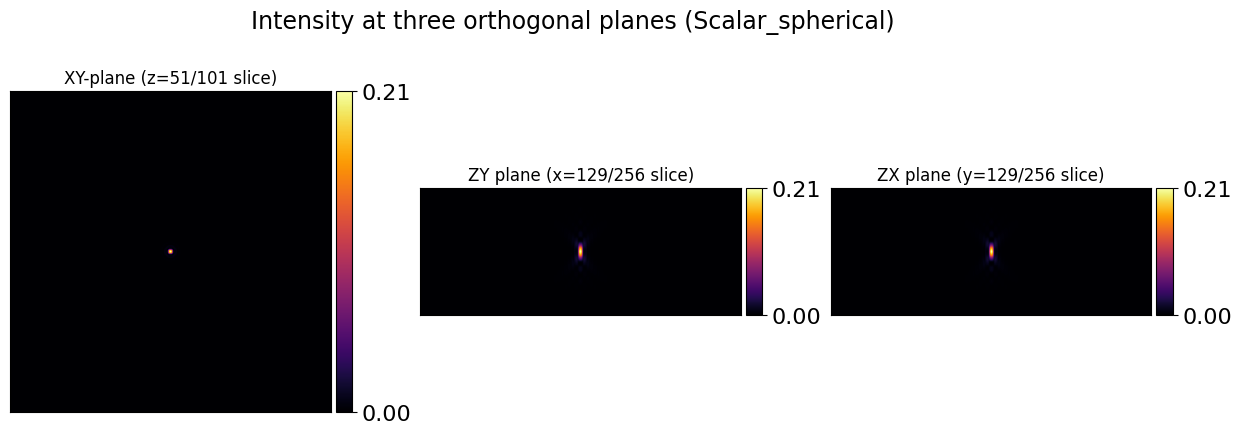

/tmp/ipykernel_1931067/151303598.py:22: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  psf = np.abs(focus_field).squeeze()**2


In [6]:
kwargs = {
    'n_pix_pupil': 127,    # Number of pixels for the pupil function
    'n_pix_psf': 256,      # Number of pixels for the PSF
    'na': 1.3,             # Higher numerical aperture (NA)
    'wavelength': 480,     # Shorter wavelength (in nm)
    'fov': 25600,           # Field of view (in nm)
    'defocus_min': -5000,  # Minimum defocus (nm)
    'defocus_max': 5000,   # Maximum defocus (nm)
    'n_defocus': 101,      # Number of defocus slices
}
propagator = ScalarSphericalPropagator(**kwargs)
focus_field = propagator.compute_focus_field() #from demo dis is psf3d 

for quantity in ['modulus', 'phase', 'intensity']:
    plot_psf(
        psf=focus_field,
        name_of_propagator=propagator.get_name(),
        quantity=quantity,
        show_titles=True,
        show_cbar_ticks=True
    )
psf = np.abs(focus_field).squeeze()**2

# Why that squared factor? In optics, the point spread 
# function (PSF) is often represented as the square of the magnitude of the complex field 
# because intensity is proportional to the square of the field's magnitude.


In [8]:
psf.shape

torch.Size([101, 256, 256])

In [14]:
#convert to nupy array
npy_psf = np.array(psf)
psf_sum = np.sum(npy_psf)
print(psf_sum)

if psf_sum != 0:
    npy_psf = npy_psf / psf_sum
psf_sum = np.sum(npy_psf)
print(psf_sum)
#save to file
np.save('/home/dcorrea/deconvolution/psf/psf_simple.npy', npy_psf) 


252.98784
1.0000002
